 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [149]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [150]:
# Reading whale returns
whale_returns = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns, index_col= "Date", parse_dates=True, infer_datetime_format=True)
whale_df.sort_index(ascending=True, inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [151]:
# Count nulls
print(whale_df.isnull().sum())
print(whale_df)

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY I

In [152]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [153]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns, index_col= "Date", parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(ascending=True, inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [154]:
# Count nulls
print(algo_df.isnull().sum())
print(algo_df)

Algo 1    0
Algo 2    6
dtype: int64
              Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1241 rows x 2 columns]


In [155]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [156]:
# Reading S&P 500 Closing Prices
sp500_history = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history, index_col= "Date", parse_dates=True, infer_datetime_format=True)
sp500_history_df.sort_index(ascending=True, inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [157]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [158]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace('$','').astype('float')
print(sp500_history_df.dtypes)
sp500_history_df.head()

Close    float64
dtype: object


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [159]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [160]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [161]:
# Rename Column
sp500_daily_returns.columns = ["S&P 500"]
sp500_daily_returns

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [162]:
# Concatenate all DataFrames into a single DataFrame
daily_returns = pd.concat([ whale_df, algo_df, sp500_daily_returns ], axis="columns", join="inner")
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

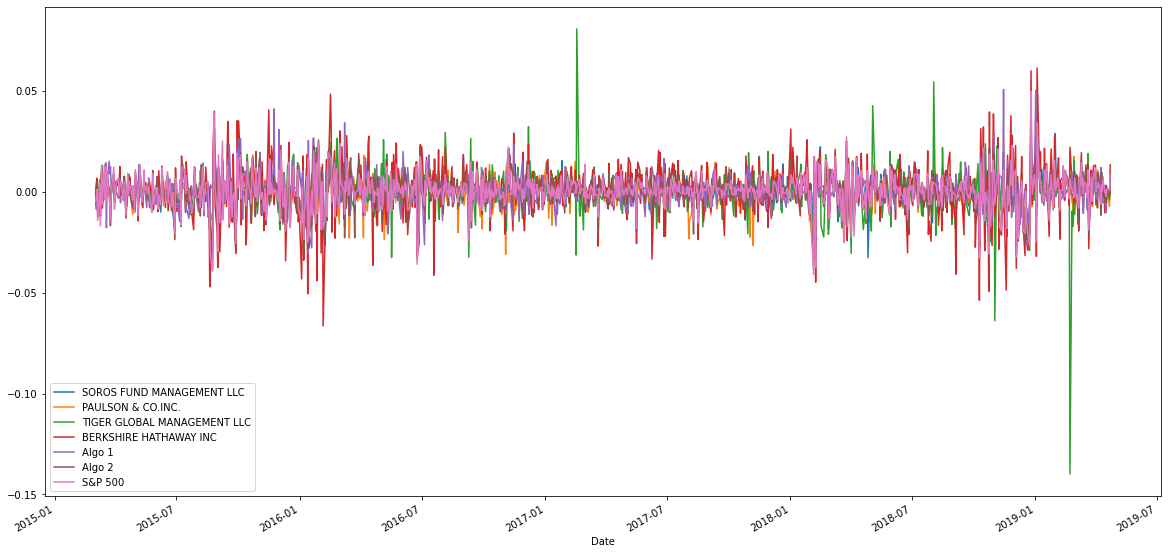

In [163]:
# Plot daily returns
daily_returns.plot(figsize=(20,10))

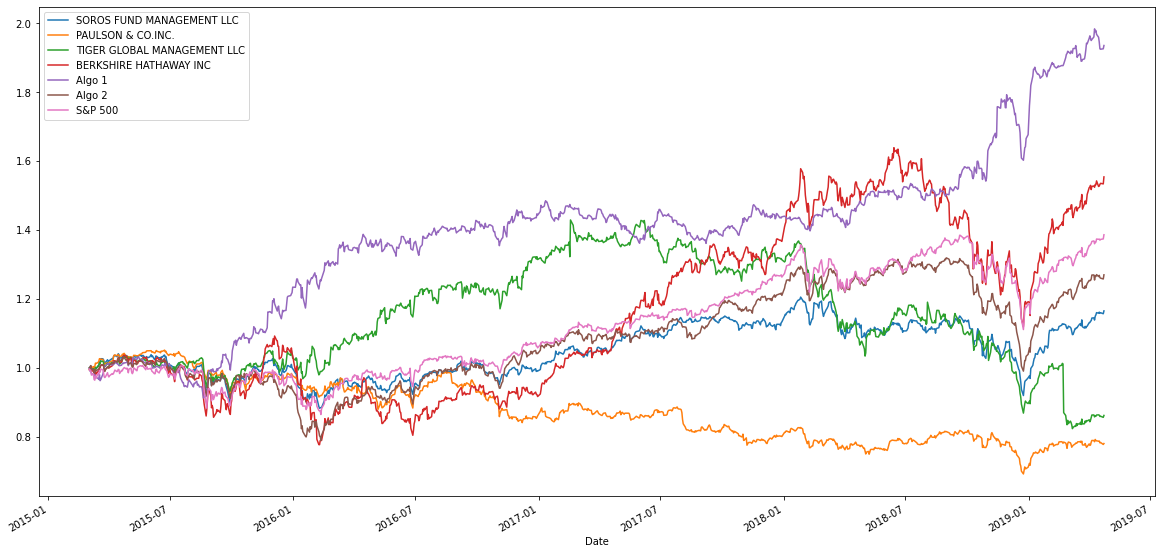

In [164]:
# Plot cumulative returns
cumulative_returns = daily_returns.cumsum(axis=0, skipna=True)
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.plot(figsize=(20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

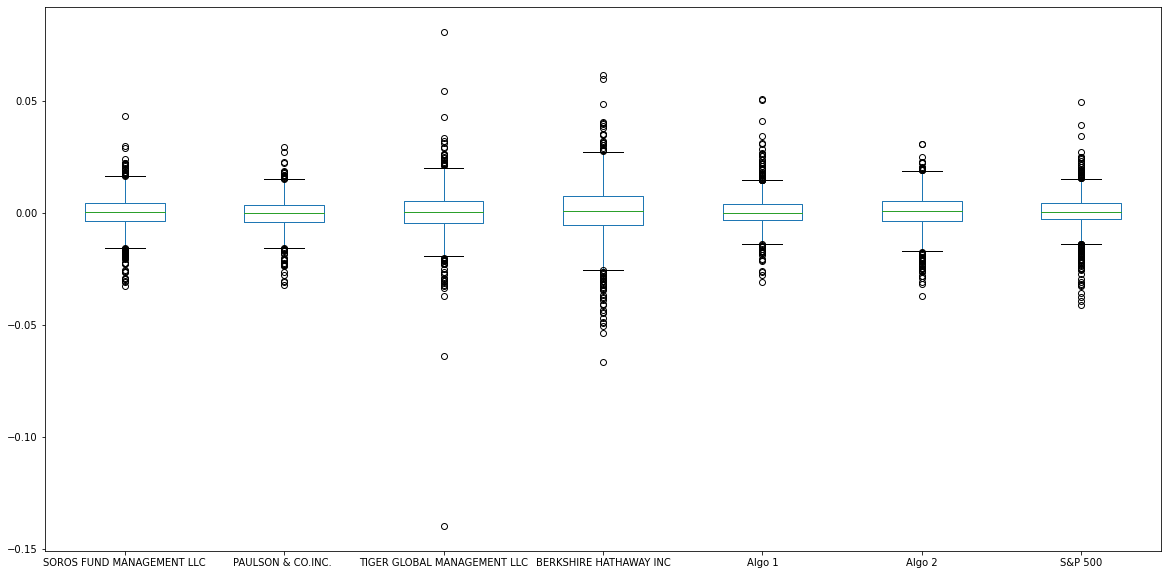

In [165]:
# Box plot to visually show risk
daily_returns.plot(kind= "box", figsize=(20,10))

In [166]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
daily_returns_std = pd.DataFrame(daily_returns.std())
daily_returns_std.columns = ["STD"]
daily_returns_std

,STD
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500,0.008554


In [167]:
# Determine which portfolios are riskier than the S&P 500
riskier = daily_returns_std.loc[daily_returns_std["STD"] > daily_returns_std.loc["S&P 500", "STD"]]
riskier

,STD
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [168]:
# Calculate the annualized standard deviation (252 trading days)
annualize_sd = daily_returns_std * np.sqrt(252)
annualize_sd

,STD
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
S&P 500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

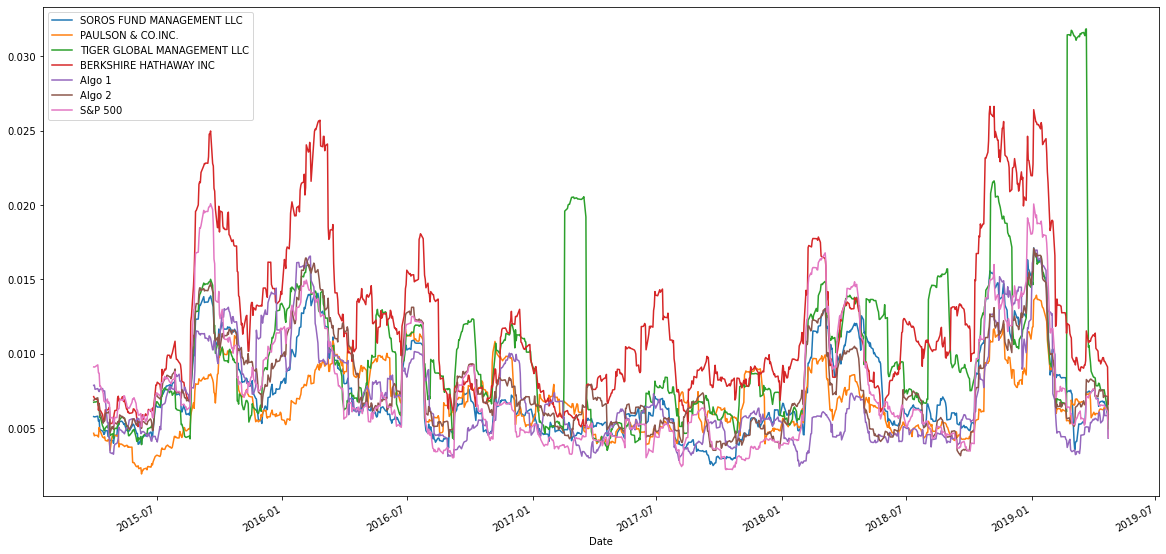

In [169]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
daily_returns.rolling(window=21).std().plot(kind='line', figsize=(20,10))

In [170]:
# Construct a correlation table
correlation = daily_returns.corr()
print("Algo 2 has the highest correlation with the S&P 500")
correlation.style.background_gradient(cmap ="viridis")

Algo 2 has the highest correlation with the S&P 500


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


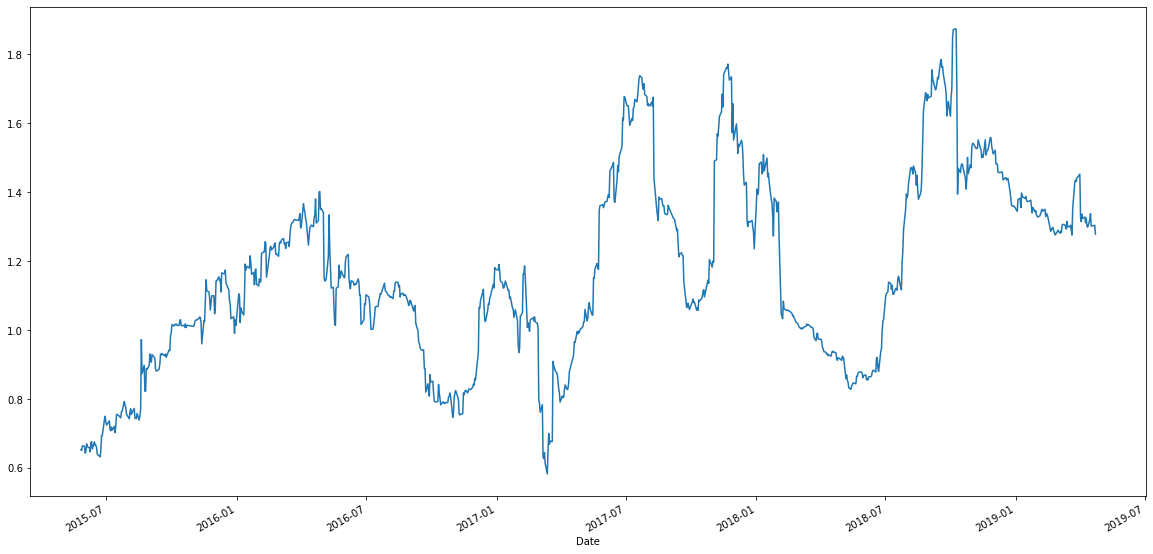

In [202]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance_berkshire = daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window = 60).cov(daily_returns["S&P 500"])
variance_berkshire = daily_returns["S&P 500"].rolling(window = 60).var()
beta_berkshire = covariance_berkshire / variance_berkshire
beta_berkshire.plot(kind="line", figsize=(20,10))

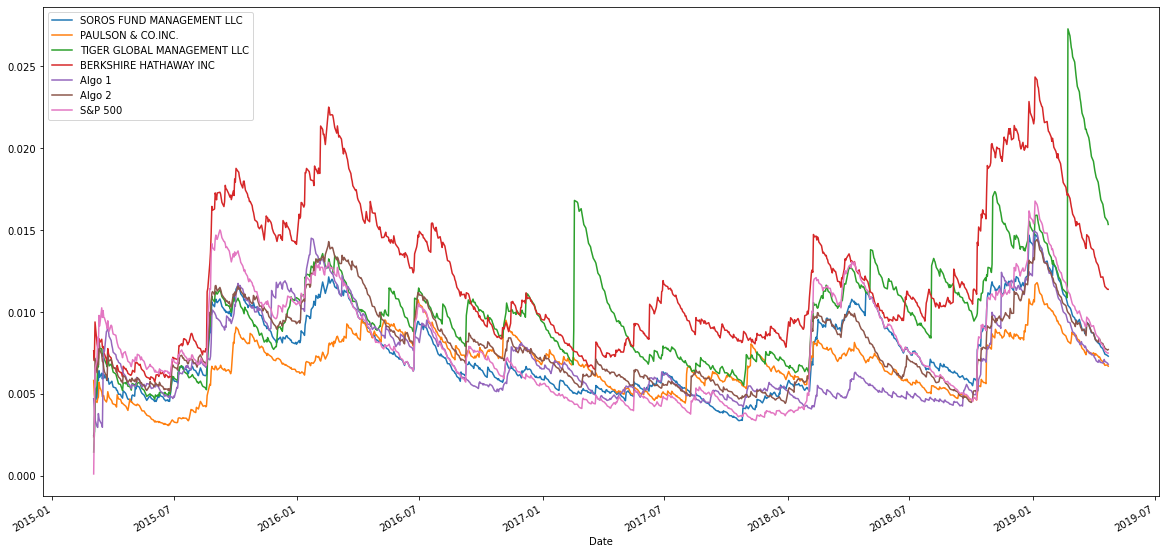

In [203]:
# Calculate a rolling window using the exponentially weighted moving average.
daily_returns.ewm(halflife = 21).std().plot(figsize=(20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [173]:
# Calculate annualized Sharpe Ratios
sharpe_ratio = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

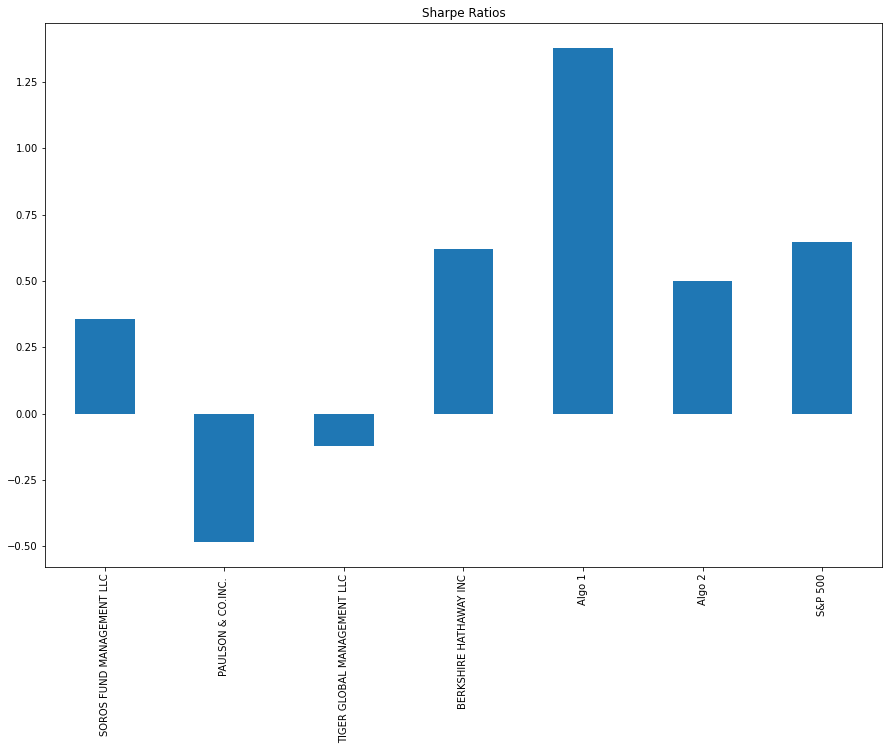

In [174]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", figsize = (15,10), title = "Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [175]:
# Read the first stock
CRSP = Path("Resources/CRSP.csv")
CRSP_df = pd.read_csv(CRSP, index_col= "Date", parse_dates=True, infer_datetime_format=True)
CRSP_df.rename(columns= {"Close":"CRSP"}, inplace=True)
CRSP_df.sort_index(ascending=True, inplace=True)
CRSP_df.head()

,CRSP
Date,
2016-10-19,14.09
2016-10-20,13.94
2016-10-21,13.82
2016-10-24,14.01
2016-10-25,14.41


In [176]:
# Read the second stock
MSFT = Path("Resources/MSFT.csv")
MSFT_df = pd.read_csv(MSFT, index_col= "Date", parse_dates=True, infer_datetime_format=True)
MSFT_df.rename(columns= {"Close":"MSFT"}, inplace=True)
MSFT_df.sort_index(ascending=True, inplace=True)
MSFT_df.head()

,MSFT
Date,
2015-10-13,46.889999
2015-10-14,46.680000
2015-10-15,47.009998
2015-10-16,47.509998
2015-10-19,47.619999


In [177]:
# Read the third stock
BA = Path("Resources/BA.csv")
BA_df = pd.read_csv(BA, index_col= "Date", parse_dates=True, infer_datetime_format=True)
BA_df.rename(columns= {"Close":"BA"}, inplace=True)
BA_df.sort_index(ascending=True, inplace=True)
BA_df.head()

,BA
Date,
2015-10-13,140.289993
2015-10-14,134.220001
2015-10-15,137.389999
2015-10-16,137.600006
2015-10-19,138.419998


In [178]:
# Read the fourth stock
AMZN = Path("Resources/AMZN.csv")
AMZN_df = pd.read_csv(AMZN, index_col= "Date", parse_dates=True, infer_datetime_format=True)
AMZN_df.rename(columns= {"Close":"AMZN"}, inplace=True)
AMZN_df.sort_index(ascending=True, inplace=True)
AMZN_df.head()

,AMZN
Date,
2015-10-13,548.900024
2015-10-14,544.830017
2015-10-15,562.440002
2015-10-16,570.760010
2015-10-19,573.150024


In [179]:
# Read the fifth stock
PYPL = Path("Resources/PYPL.csv")
PYPL_df = pd.read_csv(PYPL, index_col= "Date", parse_dates=True, infer_datetime_format=True)
PYPL_df.rename(columns= {"Close":"PYPL"}, inplace=True)
PYPL_df.sort_index(ascending=True, inplace=True)
PYPL_df.head()

,PYPL
Date,
2015-10-13,33.220001
2015-10-14,34.049999
2015-10-15,34.619999
2015-10-16,34.290001
2015-10-19,34.840000


In [180]:
# Concatenate all stocks into a single DataFrame
my_portfolio = pd.concat([ CRSP_df, MSFT_df, BA_df, AMZN_df, PYPL_df ], axis="columns", join="inner")
my_portfolio.sort_index(ascending=True, inplace=True)
my_portfolio.head()

,CRSP,MSFT,BA,AMZN,PYPL
Date,,,,,
2016-10-19,14.09,57.529999,136.179993,817.690002,40.240002
2016-10-20,13.94,57.250000,135.839996,810.320007,40.090000
2016-10-21,13.82,59.660000,135.630005,818.989990,44.150002
2016-10-24,14.01,61.000000,137.449997,838.090027,43.869999
2016-10-25,14.41,60.990002,139.020004,835.179993,43.310001


In [181]:
# Reset the index
my_portfolio.reset_index(level=None, drop=False, col_level=0, col_fill="")

,Date,CRSP,MSFT,BA,AMZN,PYPL
0,2016-10-19,14.090000,57.529999,136.179993,817.690002,40.240002
1,2016-10-20,13.940000,57.250000,135.839996,810.320007,40.090000
2,2016-10-21,13.820000,59.660000,135.630005,818.989990,44.150002
3,2016-10-24,14.010000,61.000000,137.449997,838.090027,43.869999
4,2016-10-25,14.410000,60.990002,139.020004,835.179993,43.310001
...,...,...,...,...,...,...
997,2020-10-06,87.720001,205.910004,159.539993,3099.959961,191.660004
998,2020-10-07,97.680000,209.830002,164.610001,3195.689941,194.610001
999,2020-10-08,95.389999,210.580002,168.000000,3190.550049,193.059998
1000,2020-10-09,98.260002,215.809998,167.330002,3286.649902,197.270004


In [210]:
# Drop Nulls
final_portfolio.dropna(inplace=True)
final_portfolio.head()

,AMZN,BA,CRSP,MSFT,PYPL
Date,,,,,
2016-10-19,817.690002,136.179993,14.09,57.529999,40.240002
2016-10-20,810.320007,135.839996,13.94,57.250000,40.090000
2016-10-21,818.989990,135.630005,13.82,59.660000,44.150002
2016-10-24,838.090027,137.449997,14.01,61.000000,43.869999
2016-10-25,835.179993,139.020004,14.41,60.990002,43.310001


In [211]:
final_portfolio.isnull().sum()

AMZN    0
BA      0
CRSP    0
MSFT    0
PYPL    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [185]:
# Calculate weighted portfolio returns
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
my_portfolio = final_portfolio.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace=True)
my_portfolio_returns.head()

Date
2016-10-20   -0.007779
2016-10-21    0.014006
2016-10-24    0.020676
2016-10-25   -0.001380
2016-10-26   -0.006423
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [186]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
portfolio_returns = pd.concat((my_portfolio_returns, daily_returns), axis = "columns" , join= "inner")
portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2016-10-20,-0.007779,-0.004313,0.005428,-0.002777,-0.000892,-0.000235,-0.000638,-0.001376
2016-10-21,0.014006,0.000168,-0.005110,-0.002161,0.000765,-0.000477,-0.000884,-0.000084
2016-10-24,0.020676,0.002757,-0.000395,0.007967,0.001300,-0.002835,0.002744,0.004750
2016-10-25,-0.001380,-0.004851,0.004397,-0.005981,-0.005773,-0.008515,-0.005852,-0.003798
2016-10-26,-0.006423,-0.004346,-0.006362,-0.004195,-0.009913,-0.002585,-0.006861,-0.001740
...,...,...,...,...,...,...,...,...
2019-04-16,0.010512,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.001377,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,-0.000239,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [187]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace = True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2016-10-20,-0.007779,-0.004313,0.005428,-0.002777,-0.000892,-0.000235,-0.000638,-0.001376
2016-10-21,0.014006,0.000168,-0.005110,-0.002161,0.000765,-0.000477,-0.000884,-0.000084
2016-10-24,0.020676,0.002757,-0.000395,0.007967,0.001300,-0.002835,0.002744,0.004750
2016-10-25,-0.001380,-0.004851,0.004397,-0.005981,-0.005773,-0.008515,-0.005852,-0.003798
2016-10-26,-0.006423,-0.004346,-0.006362,-0.004195,-0.009913,-0.002585,-0.006861,-0.001740
...,...,...,...,...,...,...,...,...
2019-04-16,0.010512,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.001377,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,-0.000239,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [188]:
portfolio_returns.isnull().sum()

my_portfolio                   0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [196]:
# Risk
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

,std
my_portfolio,0.015929
SOROS FUND MANAGEMENT LLC,0.007728
PAULSON & CO.INC.,0.006868
TIGER GLOBAL MANAGEMENT LLC,0.011744
BERKSHIRE HATHAWAY INC,0.012320
Algo 1,0.006777
Algo 2,0.007539
S&P 500,0.007958


In [197]:
highest_std = portfolio_std[portfolio_std["std"] > portfolio_std.loc["S&P 500", "std"]]
highest_std

,std
my_portfolio,0.015929
TIGER GLOBAL MANAGEMENT LLC,0.011744
BERKSHIRE HATHAWAY INC,0.012320


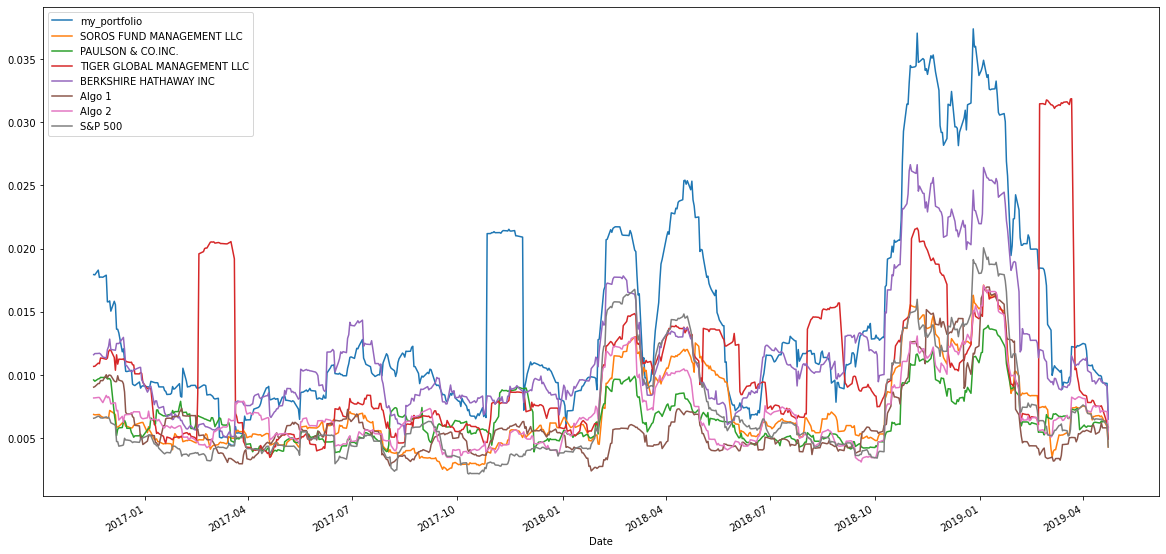

In [204]:
# Rolling
portfolio_returns.rolling(window=21).std().plot(kind="line", figsize=(20,10))

In [205]:
# Annualized Sharpe Ratios
custom_sharpe = (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252))
custom_sharpe

my_portfolio                   1.520944
SOROS FUND MANAGEMENT LLC      0.600427
PAULSON & CO.INC.             -0.526451
TIGER GLOBAL MANAGEMENT LLC   -0.661589
BERKSHIRE HATHAWAY INC         1.150313
Algo 1                         1.219600
Algo 2                         0.902318
S&P 500                        1.057555
dtype: float64

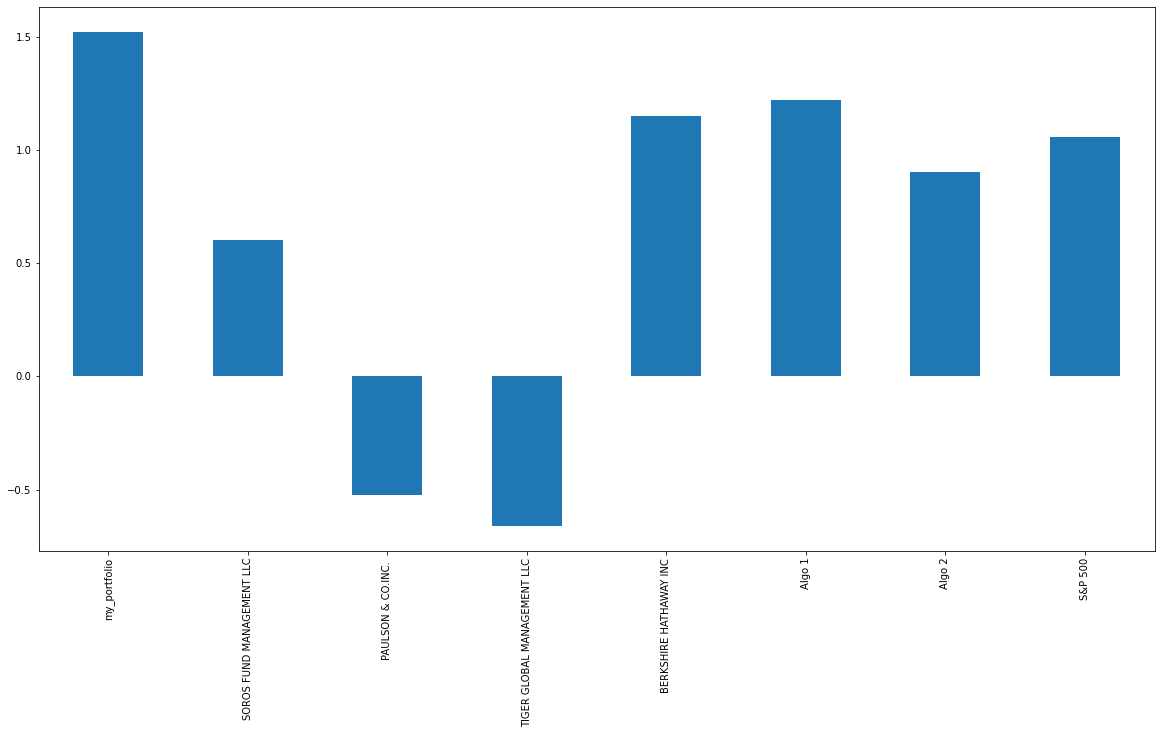

In [207]:
# Visualize the sharpe ratios as a bar plot
custom_sharpe.plot(kind="bar", figsize=(20,10))

In [209]:
# Create a correlation analysis
correlation_analysis = portfolio_returns.corr()
print("Algo 2 has the highest correlation with the S&P 500")
correlation_analysis.style.background_gradient(cmap ="viridis")

Algo 2 has the highest correlation with the S&P 500


,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
my_portfolio,1.000000,0.640519,0.476389,0.328669,0.754455,0.257215,0.642416,0.758254
SOROS FUND MANAGEMENT LLC,0.640519,1.000000,0.659148,0.482867,0.760842,0.279089,0.786989,0.809239
PAULSON & CO.INC.,0.476389,0.659148,1.000000,0.386992,0.529202,0.271402,0.690742,0.667313
TIGER GLOBAL MANAGEMENT LLC,0.328669,0.482867,0.386992,1.000000,0.355380,0.112108,0.420815,0.529329
BERKSHIRE HATHAWAY INC,0.754455,0.760842,0.529202,0.355380,1.000000,0.253544,0.713769,0.789025
Algo 1,0.257215,0.279089,0.271402,0.112108,0.253544,1.000000,0.279895,0.253448
Algo 2,0.642416,0.786989,0.690742,0.420815,0.713769,0.279895,1.000000,0.857146
S&P 500,0.758254,0.809239,0.667313,0.529329,0.789025,0.253448,0.857146,1.000000


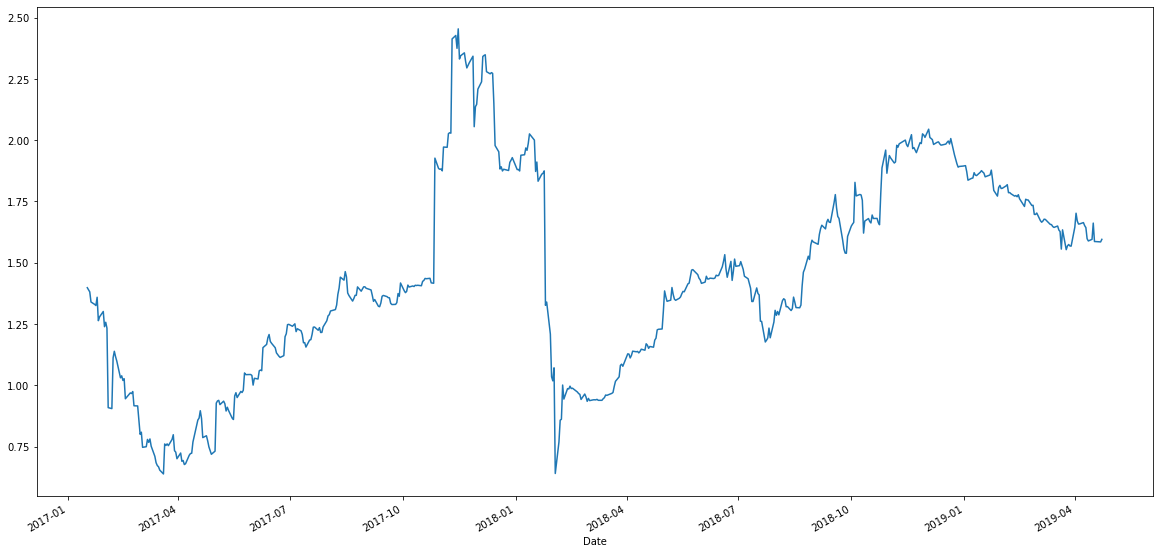

In [212]:
# Beta
covariance_custom = portfolio_returns["my_portfolio"].rolling(window = 60).cov(portfolio_returns["S&P 500"])
variance_custom = portfolio_returns["S&P 500"].rolling(window = 60).var()
beta_custom = covariance_custom / variance_custom
beta_custom.plot(kind="line", figsize=(20,10))

In [ ]:
print("Portfolio Analysis")

#Your analysis should include the following:
Using all portfolios:
The annualized standard deviation (252 trading days) for all portfolios.
The plotted rolling standard deviation using a 21 trading day window for all portfolios.
The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
A correlation table.
Using your custom portfolio and one other of your choosing:
The plotted beta. . How does your portfolio fair?
